In [61]:
#import modules and packages
from imutils.perspective import four_point_transform
from imutils import contours
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

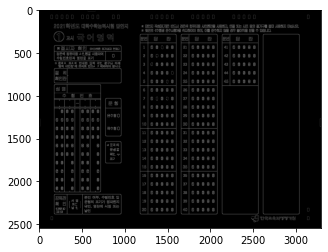

In [62]:
#load the image and preprocess
img=cv2.imread('a.png',cv2.IMREAD_COLOR)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
canny=cv2.Canny(blurred,75,200)
plt.imshow(canny,cmap='gray')

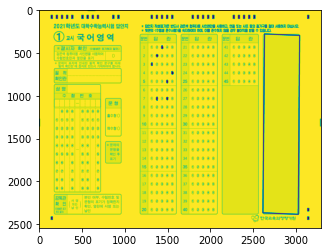

In [64]:
#finding contours
cnts=cv2.findContours(canny.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)
docCnt=None
cnts=sorted(cnts, key=cv2.contourArea, reverse=True)
for c in cnts: 
    peri=cv2.arcLength(c, True) # T=closed/F=opened
    approx=cv2.approxPolyDP(c, 0.01*peri, True)
    cv2.drawContours(gray, [approx], 0, (0, 0, 255), 10)
    # reducing vertices, (img,condition)
    if len(approx)==4:
        docCnt = approx
        break
plt.imshow(gray)